In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from itertools import cycle, islice
from sklearn.datasets import make_circles, make_moons, make_blobs, make_s_curve, make_swiss_roll

from lsda import LSDA

seed = 42
n_samples = 10

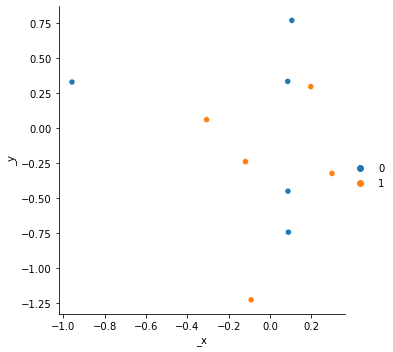

In [2]:
X_circles, y_circles = make_circles(n_samples=n_samples, factor=.5, noise=.35, random_state=seed)
sns.relplot(x=X_circles[:,0], y=X_circles[:,1], hue=y_circles);

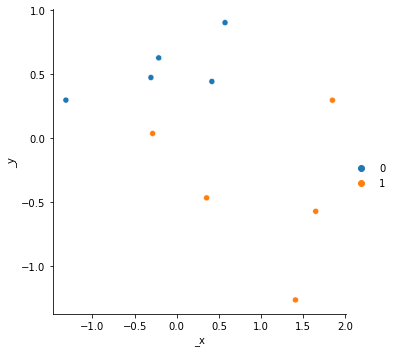

In [3]:
X_moons, y_moons = make_moons(n_samples=n_samples, noise=.5, random_state=seed)
sns.relplot(x=X_moons[:,0], y=X_moons[:,1], hue=y_moons);

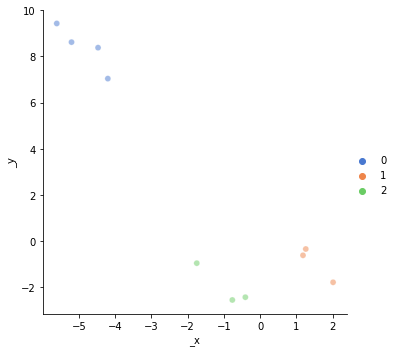

In [4]:
X, y_aniso = make_blobs(n_samples=n_samples, random_state=seed)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
sns.relplot(x=X_aniso[:,0], y=X_aniso[:,1], hue=y_aniso, alpha=.5, palette="muted");

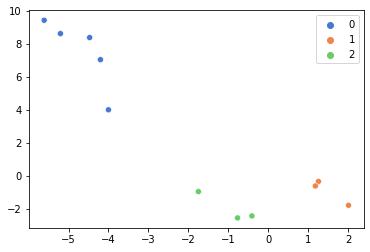

In [5]:
X_aniso_bis = np.concatenate([X_aniso, [[-4, 4]]], axis=0)
y_aniso_bis = np.concatenate([y_aniso, [0]])
sns.scatterplot(x=X_aniso_bis[:,0], y=X_aniso_bis[:,1], hue=y_aniso_bis, palette="muted");

<AxesSubplot:>

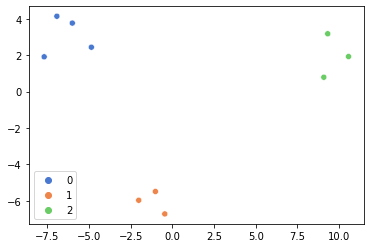

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(X_aniso, y_aniso)
X_embedded = model.transform(X_aniso)
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y_aniso, palette="muted")

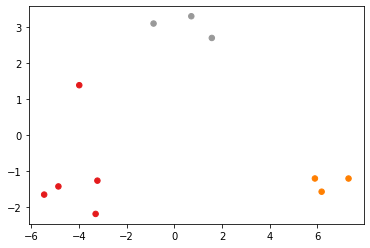

In [7]:
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(X_aniso_bis, y_aniso_bis)
X_embedded_bis = model.transform(X_aniso_bis)
plt.scatter(X_embedded_bis[:, 0], X_embedded_bis[:, 1], c=y_aniso_bis, s=30, cmap='Set1')

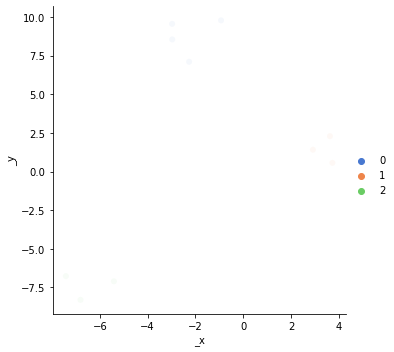

In [8]:
X_blobs, y_blobs = make_blobs(n_samples=n_samples, random_state=seed)
sns.relplot(x=X_blobs[:,0], y=X_blobs[:,1], hue=y_blobs, alpha=.05, palette="muted");

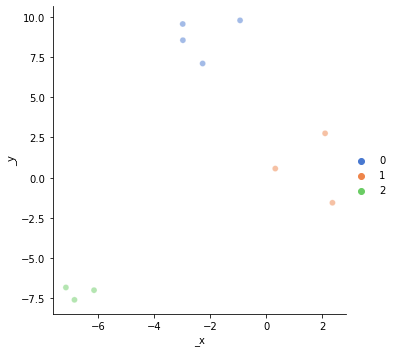

In [9]:
X_varied_blobs, y_varied_blobs = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=seed)
sns.relplot(x=X_varied_blobs[:,0], y=X_varied_blobs[:,1], hue=y_varied_blobs, alpha=.5, palette="muted");

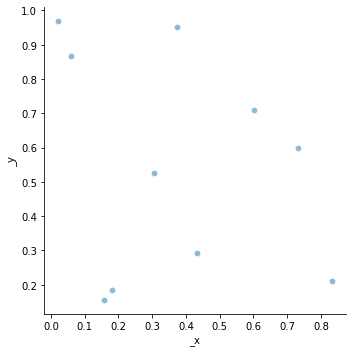

In [10]:
np.random.seed(seed)
X_no_structure, y_no_structure = np.random.rand(n_samples, 2), None
sns.relplot(x=X_no_structure[:,0], y=X_no_structure[:,1], hue=y_no_structure, alpha=.5, palette="muted");

In [11]:
# S curve
X_s_curve, y_s_curve = make_s_curve(n_samples=n_samples, random_state=seed)

# Init fig
fig = go.Figure(data=[go.Scatter3d(
    x=X_s_curve[:,0],
    y=X_s_curve[:,1],
    z=X_s_curve[:,2],
    mode='markers',
    marker=dict(
        size=5,
        color=y_s_curve,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [12]:
# S curve
X_swiss_roll, y_swiss_roll = make_swiss_roll(n_samples=n_samples, random_state=seed)

# Init fig
fig = go.Figure(data=[go.Scatter3d(
    x=X_swiss_roll[:,0],
    y=X_swiss_roll[:,1],
    z=X_swiss_roll[:,2],
    mode='markers',
    marker=dict(
        size=5,
        color=y_swiss_roll,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

# Apply LSDA

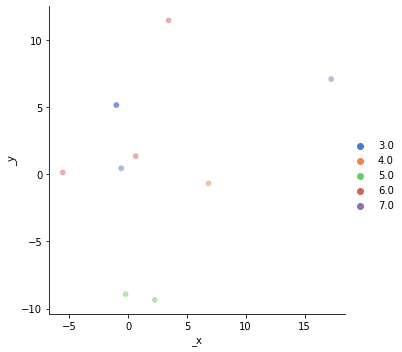

In [13]:
lsda = LSDA(n_neighbors=4, n_components=2)
y = (y_swiss_roll / 2).round()
lsda.fit(X_swiss_roll, y)
projected_X = lsda.transform(X_swiss_roll)
sns.relplot(x=projected_X[:,0], y=projected_X[:,1], hue=y, palette="muted");

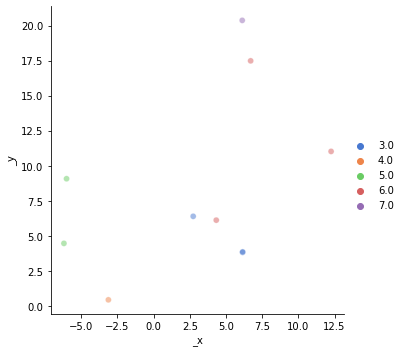

In [14]:
sns.relplot(x=X_swiss_roll[:,0], y=X_swiss_roll[:,1], hue=y, alpha=.5, palette="muted");

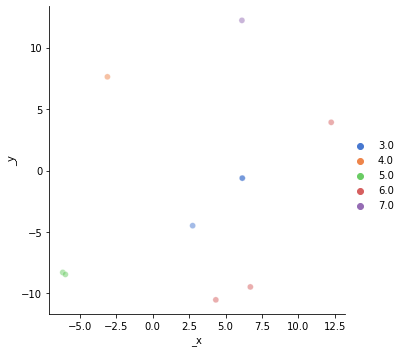

In [15]:
sns.relplot(x=X_swiss_roll[:,0], y=X_swiss_roll[:,2], hue=y, alpha=.5, palette="muted");

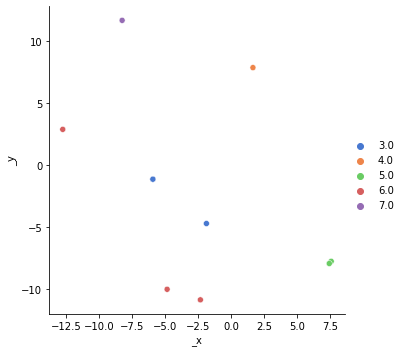

In [16]:
lsda = LSDA(n_neighbors=4, n_components=3)
X = np.array([X_swiss_roll[:,0], X_swiss_roll[:,2]]).T
lsda.fit(X, y)
projected_X = lsda.transform(X)
sns.relplot(x=projected_X[:,0], y=projected_X[:,1], hue=y, alpha=1, palette="muted");

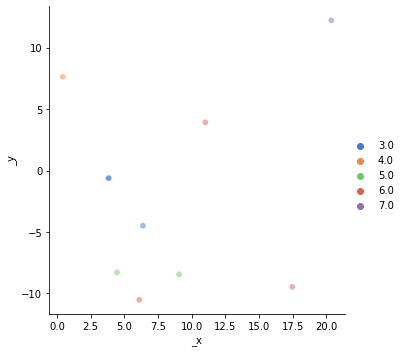

In [17]:
sns.relplot(x=X_swiss_roll[:,1], y=X_swiss_roll[:,2], hue=y, alpha=.5, palette="muted");

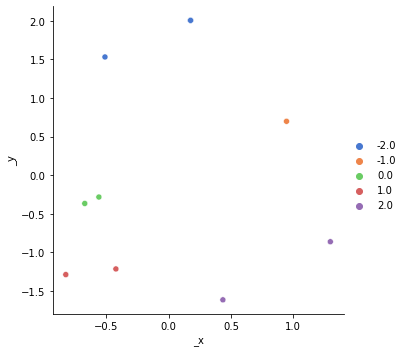

In [18]:
lsda = LSDA(n_neighbors=4, n_components=3)
y = (y_s_curve / 2).round()
lsda.fit(X_s_curve, y)
projected_X = lsda.transform(X_s_curve)
sns.relplot(x=projected_X[:,0], y=projected_X[:,1], hue=y, alpha=1, palette="muted");

# LSDA with real ordinal data

In [19]:
def read_file(k,sample,dataset):
    output = []
    with open(f'{dataset}/{sample}_{dataset}.{k}','r') as file:
        for line in file:
            data = line.strip('\n').split(' ')
            output.append(data)
    return np.array(output,dtype=float)

def import_data(sample,dataset):
    # sample = 'train' or 'test'
    # avaialble datasets : newthyroid, pasture

    data=read_file(0,sample,dataset)
    for k in range(1,30):
        data = np.row_stack((data,read_file(k,sample,dataset)))
    return data

## Raw data

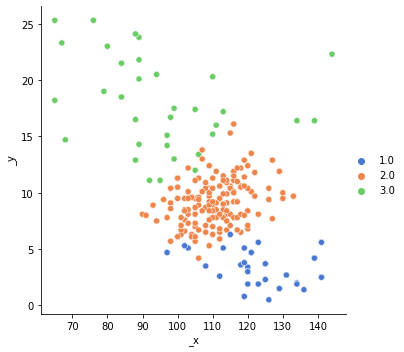

In [20]:
train = import_data('train','newthyroid')
Xtrain = train[:,0:5]
ytrain = train[:,5]
sns.relplot(x=Xtrain[:,0], y=Xtrain[:,1], hue=ytrain, alpha=1, palette="muted")

In [21]:
def grid(dataset):
    #available datasets : newthyroid, pasture
    
    train = import_data('train',dataset)
    Xtrain = train[:,0:5]
    ytrain = train[:,5]

    test = import_data('test',dataset)
    Xtest = test[:,0:5]
    ytest = test[:,5]
    
    n_neighbors = [1,5]
    alpha = [0.2, 0.8]
    plt.figure(figsize=(10,10))

    for i in range(len(n_neighbors)):
        for j in range(len(alpha)):
            lsda = LSDA(n_neighbors=n_neighbors[i], n_components=2,alpha=alpha[j])
            lsda.fit(Xtrain, ytrain)
            projected_X = lsda.transform(Xtest)
            
            ax = plt.subplot(len(n_neighbors),len(alpha),1+i+len(alpha)*j, label = f'alpha = {alpha} \n n = {n_neighbors}')
            sns.scatterplot(x=projected_X[:,0], y=projected_X[:,1], hue=ytest, alpha=1, palette="muted", ax=ax).set(
            xlabel="Dim 1", ylabel="Dim 2", title=rf"Projection pour $\alpha={alpha[j]}$ et n_neighbors$={n_neighbors[i]}$")
    plt.savefig('grid.png')
    plt.show()

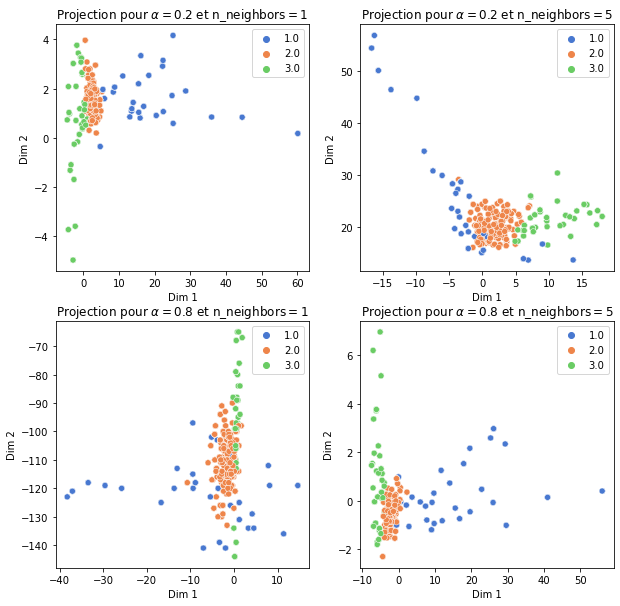

In [22]:
grid('newthyroid')